In [ ]:
# Datasets:
# ufo: https://github.com/rfordatascience/tidytuesday/blob/master/data/2019/2019-06-25/ufo_sightings.csv

In [61]:
import pandas as pd
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import numpy as np

In [62]:
import plotly.io as pio
# renderer for jupyter notebook
pio.renderers.default='notebook'
# renderer for vs code
# pio.renderers.default='vscode'
# renderer for colab
# pio.renderers.default='colab'
pio.templates.default = "plotly_dark"

In [63]:
df=pd.read_csv(r'./data/ufo_sightings.csv')

In [64]:
df.head()

date_time   city_area state        country ufo_shape  \
0  10/10/1949 20:30  san marcos    tx  united states  cylinder   
1  10/10/1956 21:00        edna    tx  united states    circle   
2  10/10/1960 20:00     kaneohe    hi  united states     light   
3  10/10/1961 19:00     bristol    tn  united states    sphere   
4  10/10/1965 23:45     norwalk    ct  united states      disk   

   encounter_length described_encounter_length  \
0            2700.0                 45 minutes   
1              20.0                   1/2 hour   
2             900.0                 15 minutes   
3             300.0                  5 minutes   
4            1200.0                 20 minutes   

                                         description date_documented  \
0  This event took place in early fall around 194...       4/27/2004   
1  My older brother and twin sister were leaving ...       1/17/2004   
2  AS a Marine 1st Lt. flying an FJ4B fighter/att...       1/22/2004   
3  My father is now 89 my brother 52 the girl wit...       4/27/2007   
4  A bright orange color changing to reddish colo...       10/2/1999   

    latitude   longitude   city_name  
0  29.883056  -97.941111  san marcos  
1  28.978333  -96.645833        edna  
2  21.418056 -157.803611     kaneohe  
3  36.595000  -82.188889     bristol  
4  41.117500  -73.408333     norwalk

In [65]:
df_apple=pd.read_csv(r'./data/AAPL.csv')

### Data Formatting

In [5]:
# df.loc[df['country']=='us','country']='united states'
# df.loc[df['country']=='au','country']='australia'
# df.loc[df['country']=='gb','country']='great britain'
# df.loc[df['country']=='ca','country']='canada'

# def remove_brackets(row):
#     return row['city_area'].split('(')[0]
# df['city_name'] = df.apply (lambda row: remove_brackets(row), axis=1)

# df.to_csv('./data/ufo_sightings.csv',index=False)

In [6]:
df.columns

Index(['date_time', 'city_area', 'state', 'country', 'ufo_shape',
       'encounter_length', 'described_encounter_length', 'description',
       'date_documented', 'latitude', 'longitude', 'city_name'],
      dtype='object')

## Visualisations (105)

### Sankey Diagram

In [196]:
us=-round(df[df['country']=='united states'].shape[0]/df.shape[0],2)
gb=-round(df[df['country']=='great britain'].shape[0]/df.shape[0],2)
au=-round(df[df['country']=='australia'].shape[0]/df.shape[0],2)
ca=-round(df[df['country']=='canada'].shape[0]/df.shape[0],2)

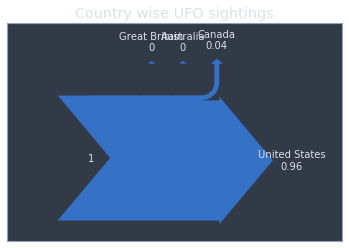

In [198]:
sankey=Sankey(flows=[1,us,gb,au,ca],labels=['','United States','Great Britain','Australia','Canada'],orientations=[0,0,1,1,1]).finish()
plt.title("Country wise UFO sightings")
plt.show()

### Alluvial Diagram

### Donut Chart

In [13]:
shape=df['ufo_shape'].value_counts()
# shape=countries[:15]

In [14]:
fig=go.Figure()
fig.add_trace(go.Pie(labels=shape.index,values=shape.values,hole=0.4))
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    title='Shapes of UFO sighted',
    showlegend=True,
    margin=go.layout.Margin(
        l=30,
        r=0,
        b=0,
        t=50,
        pad=0
    ),
)
fig.show()

### Radial Bar Chart

### Polar Area Chart

### Flow Map

### Arc Diagram

### Sunburst Diagram

In [358]:
labels=df['city_area'].tolist()+df['state'].tolist()+df['country'].tolist()
parents=df['state'].tolist()+df['country'].tolist()
countries_p=['' for i in range(len(labels)-len(parents))]
parents+=countries_p
df_sunburst=pd.DataFrame({'labels':labels,'parents':parents})
df_sunburst.drop_duplicates(subset=['labels'],inplace=True)
values=df['city_area'].value_counts().tolist()+df['state'].value_counts().tolist()+df['country'].value_counts().tolist()
df_sunburst['values']=values
df_sunburst=df_sunburst[11500:]

In [359]:
fig=go.Figure()
fig.add_trace(go.Sunburst(labels=df_sunburst['labels'],parents=df_sunburst['parents']))
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=go.layout.Margin(
        l=0,
        r=0,
        b=0,
        t=50,
        pad=0
    ),
)
fig.update_layout(
title='City, State and Country of UFO sighting',)
fig.show()

### Chord Diagram

### Treemaps

### Stacked Bar Chart

In [11]:
us_shape=df[df['country']=='united states']['ufo_shape'].value_counts()
gb_shape=df[df['country']=='great britain']['ufo_shape'].value_counts()
ca_shape=df[df['country']=='canada']['ufo_shape'].value_counts()
au_shape=df[df['country']=='australia']['ufo_shape'].value_counts()

In [12]:
fig=go.Figure(data=[
                    go.Bar(name='United States',x=us_shape.index,y=us_shape.values,text=us_shape.values,textposition='auto'),
                    go.Bar(name='Great Britain',x=gb_shape.index,y=gb_shape.values,text=gb_shape.values,textposition='auto'),
                    go.Bar(name='Canada',x=ca_shape.index,y=ca_shape.values,text=ca_shape.values,textposition='auto'),
                    go.Bar(name='Australia',x=au_shape.index,y=au_shape.values,text=au_shape.values,textposition='auto')
])
fig.update_layout(barmode='stack',title_text='UFO shape distribution by Country',yaxis_title='Count',xaxis_title='UFO shape')
fig.show()

### Isoline Map

### Word Cloud

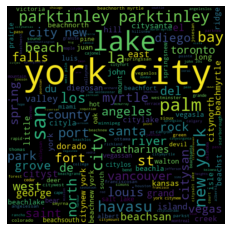

In [436]:
wordcloud = WordCloud(width=480, height=480, background_color='black').generate(''.join(df['city_name'].tolist()))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=10, y=10)
plt.show()

### Radial Line Graph

### Choropleth Map

In [93]:
states=df[df['country']=='united states']['state'].astype(str)
states=states.str.upper()
states=states.tolist()
val=df[df['country']=='united states']['encounter_length'][:100]

In [94]:
fig=go.Figure()
fig.add_trace(go.Choropleth(
locations=states[:100],
    z=val.astype(float),
    locationmode='USA-states',
    colorscale='Reds'
))
fig.update_layout(
    title_text='UFO sighting duration',
geo_scope='usa')
fig.show()

### Violin Plot

In [9]:
v=df['encounter_length'].unique()
value=[]
for i in v:
    if i < 1000:
        value.append(i)

In [10]:
fig=go.Figure()
fig.add_trace(go.Violin(y=value,box_visible=True,line_color='white',x0="UFO Encounter Duration",meanline_visible=True,fillcolor='green',opacity=0.5))
fig.update_layout(yaxis_zeroline=False)
fig.show()

### Heat Map

### Waterfall Plot

### Proportional Area Chart (Square)

### Hanging Rootgram

### Multilevel Donut Chart

### Bar Chart (Vertical)

In [11]:
ufo_shape_graph=df['ufo_shape'].value_counts()
fig=go.Figure()
fig.add_trace(go.Bar(x=ufo_shape_graph.index,y=ufo_shape_graph.values,orientation='v',text=ufo_shape_graph.values,textposition='auto'))
fig.update_layout(
title='UFO shapes distribution',
xaxis_title='Count',
yaxis_title='UFO shape')
fig.show()

### Hive Plot

### Bubble Map Chart

### Stream Graph

### Parallel Sets

### Pie Chart

In [16]:
shape=df['ufo_shape'].value_counts()
fig=go.Figure()
fig.add_trace(go.Pie(labels=shape.index,values=shape.values))
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    title='Shapes of UFO sighted',
    showlegend=True,
    margin=go.layout.Margin(
        l=30,
        r=0,
        b=0,
        t=50,
        pad=0
    ),
)
fig.show()

### Packed Circle Chart

### Stacked Area Chart

### Proportional Area Chart (Circle)

### Bubble Chart

In [203]:
temp_df=df[df['encounter_length']<=100]

In [204]:
fig=go.Figure(data=[go.Scatter(
x=temp_df['city_name'],y=temp_df['ufo_shape'],
    mode='markers',
    marker_size=temp_df['encounter_length']
)])
fig.show()

### Radar Diagram

### Convex Treemap

### Population Pyramid

### Parallel Coordinates

### Nested Proportional Area Chart

### Boxplot

In [34]:
us=df[(df['country']=='united states') & (df['encounter_length']<=1000)]['encounter_length']
gb=df[(df['country']=='great britain') & (df['encounter_length']<=1000)]['encounter_length']
au=df[(df['country']=='australia') & (df['encounter_length']<=1000)]['encounter_length']
ca=df[(df['country']=='canada') & (df['encounter_length']<=1000)]['encounter_length']

In [37]:
fig=go.Figure()
fig.add_trace(go.Box(y=us,name='United States'))
fig.add_trace(go.Box(y=gb,name='Great Britain'))
fig.add_trace(go.Box(y=au,name='Australia'))
fig.add_trace(go.Box(y=ca,name='Canada'))
fig.update_layout(title='UFO sighting duration in each country',xaxis_title='Country',yaxis_title='Duration')
fig.show()

### Dot Plot

### Grouped Bar Chart

### Semi Circle Donut Chart

### Topographic Map

### Waterfall Chart

### Pictorial Unit Chart

### Euler Diagram

### Pareto Chart

### Phase Diagram

### Icicle Diagram

### Kagi Chart

### Polar Chart

### Candlestick Chart

In [14]:
df_apple.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [17]:
fig=go.Figure()
fig.add_trace(go.Candlestick(
x=df_apple['Date'],
open=df_apple['Open'],
high=df_apple['High'],
low=df_apple['Low'],
close=df_apple['Close']))
fig.update_layout(
title="Apple Stock Price Nov-2018 to Nov-2019",
yaxis_title='AAPL Stock',
    xaxis_title='Day'
)

fig.show()

### Ternary Contour Plot

### Compound Bubble and Pie Chart

### Comparison Chart

### Column Range

### Tally Chart

### Table Chart

In [13]:
fig=go.Figure()
fig.add_trace(
    go.Table(
        header=dict(values=['Country','State','City'],
                    fill_color='paleturquoise',
                    align='left',
                   font=dict(color='black',size=12)),
        cells=dict(values=[df['country'],df['state'],df['city_name']],
                  fill_color='lavender',
                  align='left',
                  font=dict(color='black',size=12)))
)
fig.update_layout(yaxis_zeroline=False)
fig.show()

### Span Chat

### Bar Chart (Horizontal)

In [8]:
ufo_shape_graph=df['ufo_shape'].value_counts()
fig=go.Figure()
fig.add_trace(go.Bar(x=ufo_shape_graph.values,y=ufo_shape_graph.index,orientation='h'))
fig.update_layout(
title='UFO shapes distribution',
xaxis_title='Count',
yaxis_title='UFO shape')
fig.show()

### Marimekko Chart

### Lollipop Chart

### Bump Chart

### Proportional Area Chart (Icon)

### Slope Chart

### Butterfly Chart

### Icon Count

### Proportional Area Chart

### Triangle Bar Chart

### Bar Chart On a Map

### Multilevel Pie Chart

### Multiple Series 3D Bar Charts

### Clustered Force Layout

### Dumbbell Plot

### Column Sparkline

### Win Loss Sparkline

### Cartogram

### Layered Area Chart

### Pie Chart Map

### Opposite Diagram

### Stacked Ordered Area Chart

### Waffle Chart

### Pictorial Bar Chart

### Curved Bar Chart

### Circular Heat Map

### Exploded View Drawing

### Matrix Diagram (Roof Shaped)

### Matrix Diagram

### Linear Process Diagram

### Cycle Diagram

### Flow Chart

### Swimlane Flow Chart

### Target Diagram

### Organisational Chart

### Process Diagram

### Step by Step Illustration

### Network Visualisation

### Connection Map

### Matrix Diagram (Y shaped)

### Pyramid Diagram

### Non-Ribbon Chord Diagram

### Fan Chart (Geneaology)

### Illustration Diagram

### Molecule Diagram

### Route Map

### Hexagonal Binning

### Hyperbolic Tree